In [1]:
from keras.datasets.cifar10 import load_data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 556s 3us/step


((array([[[[ 59,  62,  63],
           [ 43,  46,  45],
           [ 50,  48,  43],
           ...,
           [158, 132, 108],
           [152, 125, 102],
           [148, 124, 103]],
  
          [[ 16,  20,  20],
           [  0,   0,   0],
           [ 18,   8,   0],
           ...,
           [123,  88,  55],
           [119,  83,  50],
           [122,  87,  57]],
  
          [[ 25,  24,  21],
           [ 16,   7,   0],
           [ 49,  27,   8],
           ...,
           [118,  84,  50],
           [120,  84,  50],
           [109,  73,  42]],
  
          ...,
  
          [[208, 170,  96],
           [201, 153,  34],
           [198, 161,  26],
           ...,
           [160, 133,  70],
           [ 56,  31,   7],
           [ 53,  34,  20]],
  
          [[180, 139,  96],
           [173, 123,  42],
           [186, 144,  30],
           ...,
           [184, 148,  94],
           [ 97,  62,  34],
           [ 83,  53,  34]],
  
          [[177, 144, 116],
           [16

In [3]:
(x_train, y_train), (x_test, y_test) = load_data()

In [ ]:
# 一個 pixel [[[R,G,B]]] 
# 32 x 32 x 3

In [4]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [6]:
labels = ["飛機", "汽車","鳥","貓","鹿",
          "狗","青蛙", "馬","船","卡車"]

狗


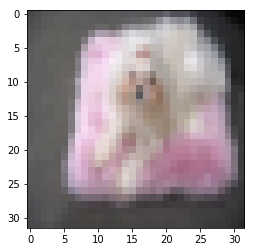

In [7]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0,49999)
print(labels[y_train[c][0]])
plt.imshow(x_train[c])

In [8]:
# 整理一下
# 先將input x的像素值常態化，好配合keras一開始隨機的那組weights
# 進mlp前，一定要把照片矩陣攤開
x_train_shape = x_train / 255
x_test_shape = x_test / 255
# y 進去的時候要 one-hot encoding: ex. 3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [9]:
# Demo
y_train_cat[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [17]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense # Conv2D 處理 2D圖片
from keras.layers import Flatten, Dropout
cnn = Sequential()

# 9(格子) * 3(RGB) * 32(filters) + 32(bias)
# 卷積層1
cnn.add(Conv2D(32, # filters = 卷積的個數
               (3,3), # kernel_size=(3,3) 卷積的大小
               strides=1, # 卷積的步長 :有每個窗格看的次數不均勻的問題 -> 棋盤效應，要考慮沒問題再調整
               activation="relu",
               padding="same",
               input_shape=(32,32,3)))

# 池化層1
cnn.add(MaxPooling2D(pool_size=(2,2)))

# 9 * 32(上一層特徵) * 64 + 64
# 卷積層2
cnn.add(Conv2D(64, # filters = 卷積的個數
               (3,3), # kernel_size=(3,3) 卷積的大小
               strides=1, # 卷積的步長 :有每個窗格看的次數不均勻的問題 -> 棋盤效應，要考慮沒問題再調整
               activation="relu",
               padding="same"))

# 池化層2
cnn.add(MaxPooling2D(pool_size=(2,2)))

# 9 * 32(上一層特徵) * 64 + 64
# 卷積層3
cnn.add(Conv2D(128, # filters = 卷積的個數
               (3,3), # kernel_size=(3,3) 卷積的大小
               strides=1, # 卷積的步長 :有每個窗格看的次數不均勻的問題 -> 棋盤效應，要考慮沒問題再調整
               activation="relu",
               padding="same"))


# 池化層3
cnn.add(MaxPooling2D(pool_size=(2,2)))


# MLP(大腦)
# 攤平
cnn.add(Flatten())
cnn.add(Dense(256, activation="relu"))
cnn.add(Dropout(0.25))
cnn.add(Dense(10, activation="softmax")) #單個特徵用sigmoid，多個特徵用softmax
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
__________

In [18]:
cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [19]:
cnn.fit(x_train_shape, y_train_cat, batch_size=200, epochs=10, validation_split=0.1)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 271s 6ms/step - loss: 1.5897 - acc: 0.4240 - val_loss: 1.2828 - val_acc: 0.5486
Epoch 2/10
45000/45000 [==============================] - 295s 7ms/step - loss: 1.1791 - acc: 0.5808 - val_loss: 1.0513 - val_acc: 0.6230
Epoch 3/10
45000/45000 [==============================] - 286s 6ms/step - loss: 1.0019 - acc: 0.6460 - val_loss: 1.0034 - val_acc: 0.6464
Epoch 4/10
45000/45000 [==============================] - 265s 6ms/step - loss: 0.8826 - acc: 0.6916 - val_loss: 0.8737 - val_acc: 0.6978
Epoch 5/10
45000/45000 [==============================] - 255s 6ms/step - loss: 0.7933 - acc: 0.7232 - val_loss: 0.8405 - val_acc: 0.7146
Epoch 6/10
45000/45000 [==============================] - 233s 5ms/step - loss: 0.7221 - acc: 0.7494 - val_loss: 0.7876 - val_acc: 0.7326
Epoch 7/10
45000/45000 [==============================] - 227s 5ms/step - loss: 0.6541 - acc: 0.7749 - val_loss: 0.7644 - v

In [20]:
cnn.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 16s 2ms/step


[0.8419231886863708, 0.7217]

In [21]:
# 把模型存起來
cnn.save("simplecnn.h5")

In [22]:
# 把模型load進來
from keras.models import load_model
old = load_model("simplecnn.h5")
old.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 12s 1ms/step


[0.8419231886863708, 0.7217]

In [23]:
from sklearn.metrics import confusion_matrix
import pandas as pd
pd.DataFrame(confusion_matrix(y_test, cnn.predict_classes(x_test_shape)))

,0,1,2,3,4,5,6,7,8,9
0,784,19,47,23,29,7,33,5,31,22
1,14,875,6,8,5,4,30,0,11,47
2,57,7,538,86,74,65,146,17,6,4
3,14,4,37,600,60,128,130,19,3,5
4,15,4,44,50,678,45,128,28,7,1
5,15,4,24,206,42,599,77,26,4,3
6,2,1,10,40,15,9,918,3,1,1
7,19,3,22,47,84,67,24,724,1,9
8,76,47,15,33,15,5,24,0,771,14
9,44,118,11,17,4,11,39,11,15,730


In [24]:
labels

['飛機', '汽車', '鳥', '貓', '鹿', '狗', '青蛙', '馬', '船', '卡車']